<img src="https://assets.epicurious.com/photos/5721301fdb3cd6fd5a7dd268/9:4/w_1998,h_888,c_limit/avocados.jpg">

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Installing & Importing Packages](#section2)<br>
3. [ Data Acquisition & Description](#section3)<br>
  - 3.1 [Description of the Dataset](#section301)<br>
  - 3.2 [Data Pre-Profiling](#section302)<br>
  - 3.3 [Observations from Preprofiling](#section303)<br>
4. [Data Preprocessing](#section4)<br>
  - 4.1 [Dropping irrelevant fields](#section401)<br>
  - 4.2 [Changing data type from Object to DateTime](#section402)<br>
  - 4.3 [Splitting Day, Month & Year from Date into different features](#section403)<br>
  - 4.4 [Renaming Column Names](#section404)<br>	
5. [Exploratory Data Analysis](#section5)<br>
  - 5.1 [Univariate Analysis](#section501)<br>
     - 5.1.1 [% Distribution of Avocado Types](#section50101)<br>
	 - 5.1.2 [Region wise Count](#section50102)<br> 
     - 5.1.3 [Distribution of Average Price](#section50103)<br> 
  - 5.2 [Bivariate Analysis](#section502)<br>
     - 5.2.1 [Analysis of AveragePrice Vs Region](#section50201)<br>
     - 5.2.2 [Analysis of AveragePrice Vs Year](#section50202)<br>
     - 5.2.3 [Analysis of Type of Bags Sold based on Region](#section50203)<br>
     - 5.2.4 [Plotting AveragePrice by Date](#section50204)<br>
     - 5.2.5 [Plotting AveragePrice Vs Type](#section50205)<br>
	 - 5.2.6 [Plotting TotalVolume Vs Region](#section50206)<br>
	 - 5.2.7 [Plotting Total Bags Vs Region](#section50207)<br>
  - 5.3 [MultiVariate Analysis](#section503)<br>
     - 5.3.1 [Analysis of Total Volume & Average Price against Year](#section50301)<br>
     - 5.3.2 [Analysis of Types of Bags, Total Bags, Total Volume & Year](#section50302)<br>
     - 5.3.3 [Analysis of Avocado Varieties against Months](#section50303)<br>
	 - 5.3.4 [Analysis of Avocado Varieties against Region](#section50304)<br>
	 - 5.3.5 [Analysis of Avocado Varieties against AveragePrice](#section50305)<br>
	 - 5.3.6 [Analysis of Avocado Varieties against Type](#section50306)<br>
     - 5.3.7 [Analysis of Total Volume Vs AveragePrice based on Year](#section50307)<br>
     - 5.3.8 [Analysis of AveragePrice, Month & Year](#section50308)<br>
	 - 5.3.9 [Analysis of AveragePrice, Month & Type](#section50309)<br>
  - 5.4 [Preprocessing for ML modelling](#section504)<br>
	- 5.4.1 [Dropping Region & Date columns from Dataframe which aren't relevant for our Model Analysis](#section50401)<br>
	- 5.4.2 [Categorical Encoding based on Avocado Type](#section50402)<br>
  - 5.5 [Correlation between numerical variables](#section505)<br>
6. [Machine Learning Modelling](#section6)<br>
 - 6.1 [Regression Machine Learning Models](#section601)<br>
     - 6.1.1 [Linear Regression Model](#section60101)<br>
         - 6.1.1.1 [Plot between Test data & Predicted Data for Linear Regression model](#section6010101)<br>
     - 6.1.2 [Decision Tree Regression Model](#section60102)<br>
         - 6.1.2.1 [Plot between Test data & Predicted Data for Decision Tree Regression model](#section6010201)<br>
     - 6.1.3 [Random Forest Regression Model](#section60103)<br>
         - 6.1.3.1 [Plot between Test data & Predicted Data for Random Forest Regression model](#section6010301)<br>  
 - 6.2 [Plot Comparing Test & ML Model Prediction values](#section602)<br>
 - 6.3 [Plot Comparing ML Model Errors](#section603)<br>
 - 6.4 [Plot Comparing Test Values with ML Model Predictions](#section604)<br> 
 - 6.5 [Model Evaluation Metrics](#section605)<br>
     - 6.5.1 [Mean Absolute Error value across Algorithms](#section60501)<br>
     - 6.5.2 [Mean Square Error value across Algorithms](#section60502)<br>
     - 6.5.3 [Root Mean Square Error value across Algorithms](#section60503)<br>
     - 6.5.4 [Mean Absolute Percentage Error value across Algorithms](#section60504)<br>
		- 6.5.4.1 [Custom Function to Calculate Mean Absolute Percentage Error](#section6050401)<br>
     - 6.5.5 [R Square Error value across Algorithms](#section60505)<br> 
	 - 6.5.6 [Dataframe showing ML Models & Evaluation Metrics against those Models](#section60506)<br>
7. [Conclusion](#section7)<br>

<a id=section1></a>
##   1.Problem Statement

The goal is to **build a model** to **predict Average Price** of Avocados of different types. 

<a id=section2></a>
## 2. Installing & Importing Packages

### **Installing Libraries**

In [1]:
!pip install -q datascience                                        
!pip install -q pandas-profiling 

### **Upgrading Libraries**

In [2]:
!pip install -q --upgrade pandas-profiling 

### **Importing Packages**

In [3]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing package pandas (For Panel Data Analysis)
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface to use matplotlib
import seaborn as sns                                               # Importing seaborn library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
import scipy as sp                                                  # Importing library for scientific calculations
#-------------------------------------------------------------------------------------------------------------------------------
import plotly.graph_objs as go


from scipy.stats import norm
from sklearn import metrics

pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', None)         # To display all the data in each column
pd.set_option('display.max_columns', None)          # To display every column of the dataset in head()

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.

sns.set()

from subprocess import check_output


<a id= section3></a>
## 3. Data Acquisition & Description

#### Importing the Dataset

In [4]:
df = pd.read_csv("avocado.csv")
print('Data Shape:', df.shape)
df.head(5)

Data Shape: (18249, 14)


Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

**Observations**

- The dataset comprises of __18249 Rows_and_14 Columns__.

<a id= section301></a>
### **Data Description**

This dataset provides purchase analysis of various types of Avocados which are segmented based on their type (Conventional or Organic) & PLU (Price Look-Up) viz., 4046, 4225, 4770 across regions from 2015-2018.

| Column Name                    | Description                                                                                |
| -------------------------------|:------------------------------------------------------------------------------------------:| 
| Date  	                     | The date of the observation
| AveragePrice                   | The average price of a single avocado - target variable
| Total Volume                   | Total number of avocados sold
| 4046  	                     | Total number of avocados with PLU 4046 sold
| 4225      	                 | Total number of avocados with PLU 4225 sold
| 4770               	         | Total number of avocados with PLU 4770 sold
| Total Bags                     | Total number of Avocado Bags sold
| Small Bags                     | Total number of Small Bags sold
| Large Bags                     | Total number of Large Bags sold
| XLarge Bags                    | Total number of XLarge Bags sold
| Type   	                     | Conventional or Organic
| year	                         | The year
| Region	                     | The city or region of the observation

In [5]:
df.describe(include ='all')

Unnamed: 0        Date  AveragePrice  Total Volume          4046  \
count   18249.000000       18249  18249.000000  1.824900e+04  1.824900e+04   
unique           NaN         169           NaN           NaN           NaN   
top              NaN  2018-02-11           NaN           NaN           NaN   
freq             NaN         108           NaN           NaN           NaN   
mean       24.232232         NaN      1.405978  8.506440e+05  2.930084e+05   
std        15.481045         NaN      0.402677  3.453545e+06  1.264989e+06   
min         0.000000         NaN      0.440000  8.456000e+01  0.000000e+00   
25%        10.000000         NaN      1.100000  1.083858e+04  8.540700e+02   
50%        24.000000         NaN      1.370000  1.073768e+05  8.645300e+03   
75%        38.000000         NaN      1.660000  4.329623e+05  1.110202e+05   
max        52.000000         NaN      3.250000  6.250565e+07  2.274362e+07   

                4225          4770    Total Bags    Small Bags    Large Bags  \
count   1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean    2.951546e+05  2.283974e+04  2.396392e+05  1.821947e+05  5.433809e+04   
std     1.204120e+06  1.074641e+05  9.862424e+05  7.461785e+05  2.439660e+05   
min     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%     3.008780e+03  0.000000e+00  5.088640e+03  2.849420e+03  1.274700e+02   
50%     2.906102e+04  1.849900e+02  3.974383e+04  2.636282e+04  2.647710e+03   
75%     1.502069e+05  6.243420e+03  1.107834e+05  8.333767e+04  2.202925e+04   
max     2.047057e+07  2.546439e+06  1.937313e+07  1.338459e+07  5.719097e+06   

          XLarge Bags          type          year               region  
count    18249.000000         18249  18249.000000                18249  
unique            NaN             2           NaN                   54  
top               NaN  conventional           NaN  BaltimoreWashington  
freq              NaN          9126           NaN                  338  
mean      3106.426507           NaN   2016.147899                  NaN  
std      17692.894652           NaN      0.939938                  NaN  
min          0.000000           NaN   2015.000000                  NaN  
25%          0.000000           NaN   2015.000000                  NaN  
50%          0.000000           NaN   2016.000000                  NaN  
75%        132.500000           NaN   2017.000000                  NaN  
max     551693.650000           NaN   2018.000000                  NaN

#### **Data Information**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


<a id=section302></a>
### Data Pre-Profiling  

In [8]:
profile= df.profile_report(title= "Avacado before Pre-Profiling", progress_bar=False ,minimal = True)
profile.to_file(output_file="Avacado_pre_profiling.html")


<a id=section303></a>
### Observations from Preprofiling

**Observations from Pandas Profiling before Data Processing**
__Dataset info__:
* Number of variables: 14
* Number of observations: 18249
* Missing cells: 0 (0%)

__Variables types__: 
* Numeric: 10
* Categorical: 4
* Rejected: 0

#### . 4046 is highly correlated with Total Volume, 4225, Total Bags & Small Bags
#### . 4225 is highly correlated with Total Volume, 4046, Total Bags & Small Bags
#### . Total Volume is highly correlated with 4046, 4225, Total Bags & Small Bags
#### . Total Bags is highly correlated with Total Volume, 4046, 4225, Small Bags, Large Bags
#### . Small Bags is highly correlated with Total Volume, 4046, 4225, Total Bags, Large Bags
#### . 4046 has 242 (1.3%) zeros
#### . 4770 has 5497 (30.1%) zeros
#### . Large Bags has 2370 (13.0%) zeros
#### . XLarge Bags has 12048 (66.0%) zeros

<a id=section4></a>
## Data Preprocessing

<a id=section40101></a>
### Dropping irrelevant fields

In [9]:
df.drop('Unnamed: 0',axis=1,inplace=True)

<a id=section40102></a>
### Changing data type from Object to DateTime

In [10]:
df['Date']=pd.to_datetime(df['Date'])

<a id=section40103></a>
### Splitting Day, Month & Year from Date into different features

In [11]:
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)
df['Year']=df['Date'].apply(lambda x:x.year)

<a id=section40103></a>
###  Renaming Column Names

In [12]:
df.rename(columns={'Total Volume':'TotalVolume','Total Bags':'TotalBags','Small Bags':'SmallBags','Large Bags':'LargeBags','XLarge Bags':'XLargeBags'},inplace=True)

<a id=section5></a>
## Exploratory Data Analysis

## Analysis Based on Metrics

<a id=section501></a>
## *Univariate Analysis*

 <a id=section50101></a>
### % Distribution of Avocado Types

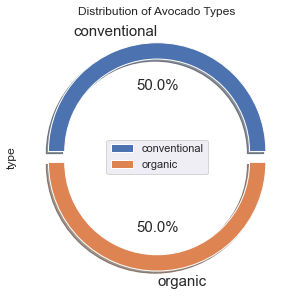

In [13]:
df['type'].value_counts().plot(kind='pie', explode=[0.05,0.05], fontsize=15, autopct='%3.1f%%', 
                                               figsize=(5,5), shadow=True, legend=True, 
                                               wedgeprops=dict(width=0.15))
plt.legend(loc='center')
plt.title("Distribution of Avocado Types")
plt.show()

- There are two types of Avocado which are equally distributed.

 <a id=section50102></a>
### Region wise Count

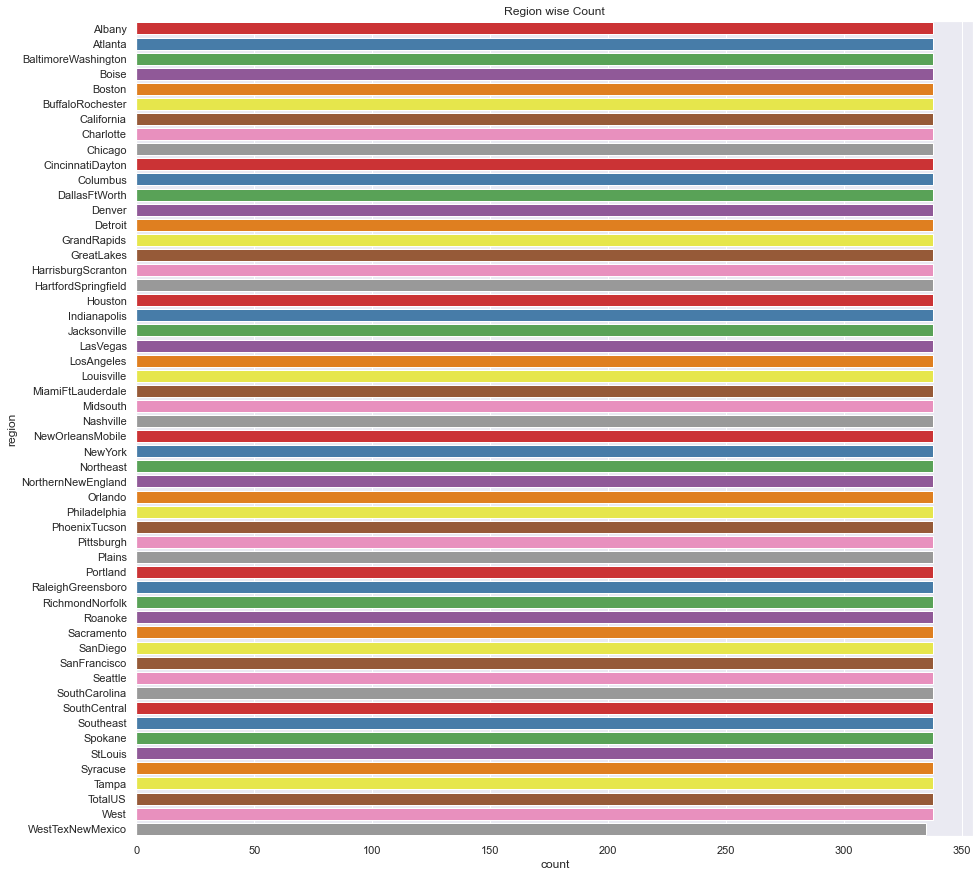

In [13]:
sns.countplot(y='region',data=df,palette="Set1")
fig=plt.gcf()
fig.set_size_inches(15,15)
plt.title("Region wise Count")
plt.show()

 <a id=section50103></a>
### Distribution of Average Price

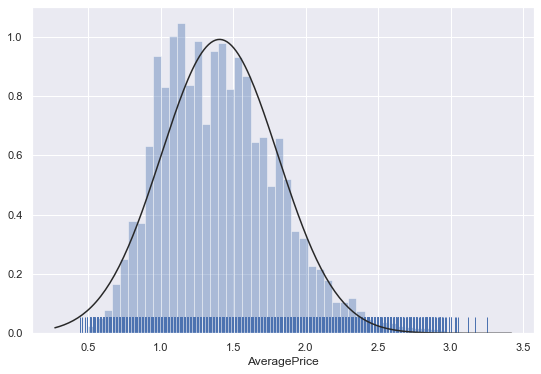

In [14]:
#fig, ax = plt.subplots(figsize=(7,7))
plt.figure(figsize=(9,6))
sns.set()
sns.distplot(df['AveragePrice'],rug=True,kde=False,fit=norm)

- Average Price of Avocado's is Normally Distributed.

<a id=section502></a>
## *Bivariate Analysis*

<a id=section50201></a>
### Analysis of AveragePrice Vs Region

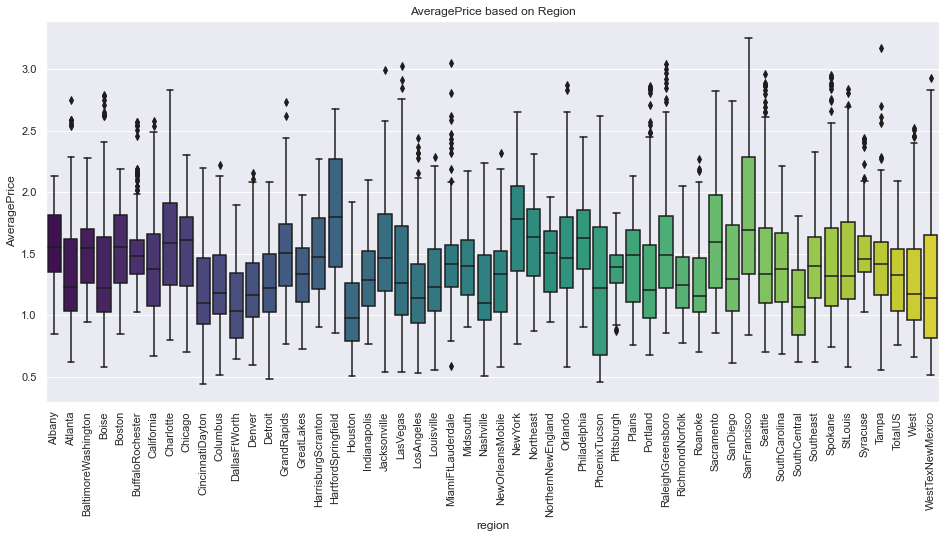

In [15]:
plt.figure(figsize=(16, 7))
sns.boxplot(data=df, x='region', y='AveragePrice', palette='viridis', width=0.8)
plt.xticks(rotation=90)
plt.title("AveragePrice based on Region")
plt.show()

- AveragePrice is highest in Sanfrancisco and least in CincinnatiDayton.

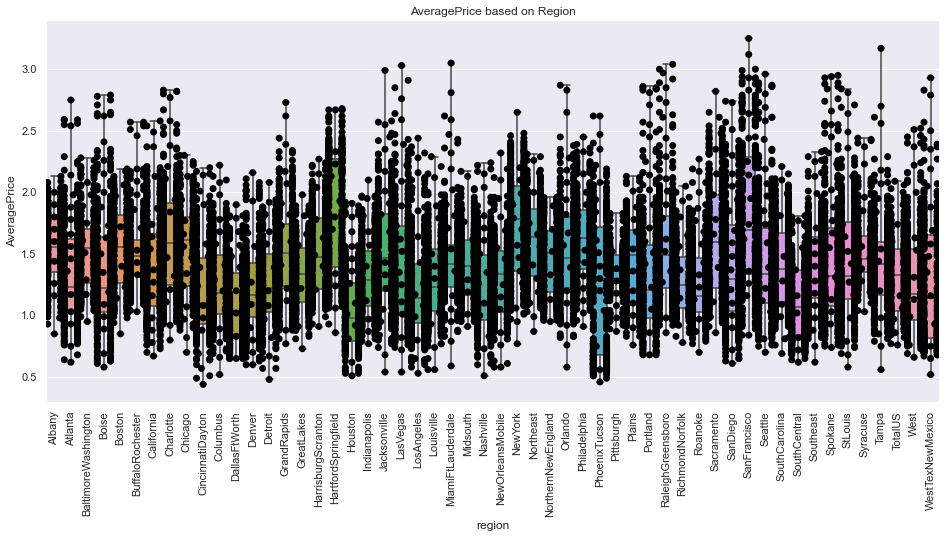

In [16]:
g = sns.boxplot(y = "AveragePrice",
              x = 'region',
              data = df, whis=np.inf)
g = sns.swarmplot(y = "AveragePrice",
              x = 'region',
              data = df,
              # Decrease the size of the points to avoid crowding
              size = 7,color = 'black')
# remove the top and right line in graph
sns.despine()
plt.xticks(rotation=90)
plt.title("AveragePrice based on Region")
g.figure.set_size_inches(16,7)
plt.show()

<a id=section50202></a>
### Analysis of AveragePrice Vs Year

Text(0.5, 1.0, 'Average Price Vs Year')

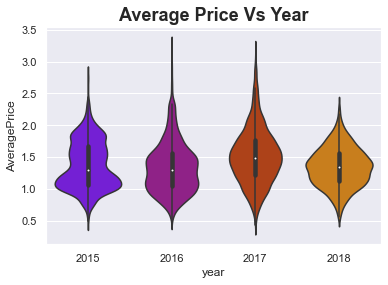

In [16]:
ax=sns.violinplot(x="year",y="AveragePrice",palette="gnuplot", data=df)
plt.title("Average Price Vs Year", fontsize=18, fontweight="bold")

 - Average Price is highest in 2016.

 - Average Price is least in 2017.

 - Average Price varied a lot in 2016 & 2017.

<a id=section50203></a>
### Analysis of Type of Bags Sold based on Region

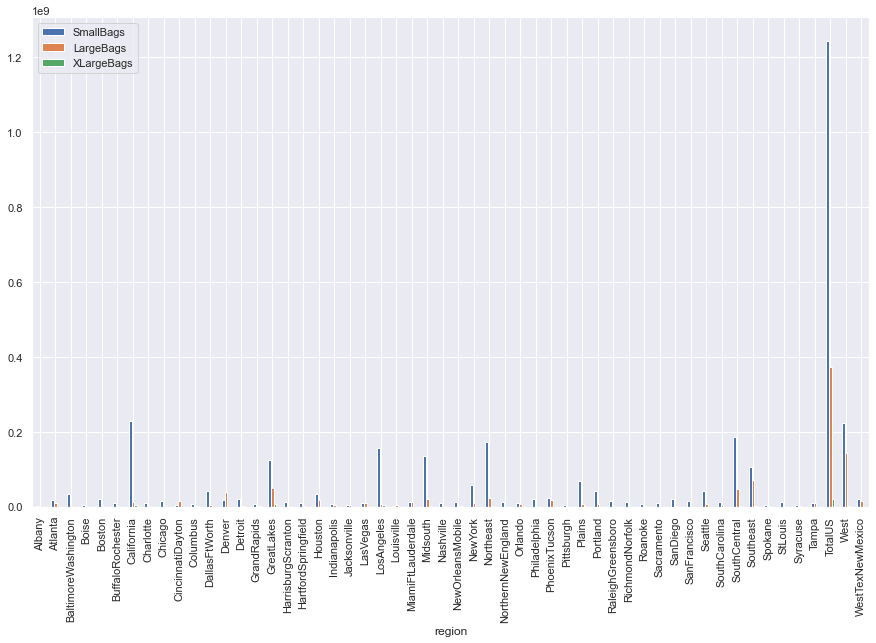

In [17]:
Bags = df[['SmallBags', 'LargeBags','XLargeBags']].groupby(df.region).sum()
Bags.plot(kind='bar')
fig=plt.gcf()
fig.set_size_inches(15,9)

- Consumption of Small, Large & XLarge is highest in TotalUS region.

- Among the types of Bags : Small is largest consumed, followed by Large & XLarge.

- XLarge Bags wasn't used in most of the regions.

- The Least consumption is in Albany.

<a id=section50204></a>
### Plotting AveragePrice by Date

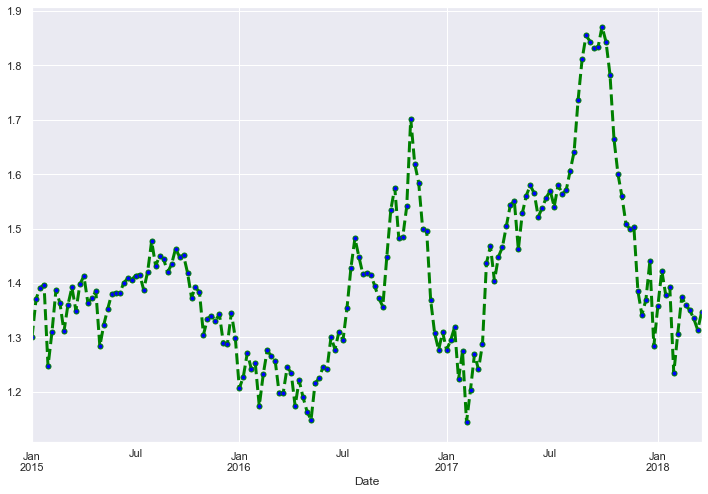

In [18]:
avgprice_dt=df.groupby('Date').mean()
plt.figure(figsize=(12,8))
avgprice_dt['AveragePrice'].plot(color='green', linestyle='dashed', linewidth = 3,marker='.', markerfacecolor='blue', markersize=10)


- Average Price is highest in Oct 2017.

<a id=section50205></a>
### Plotting AveragePrice Vs Type

Text(0.5, 1.0, 'Average Price Vs Type')

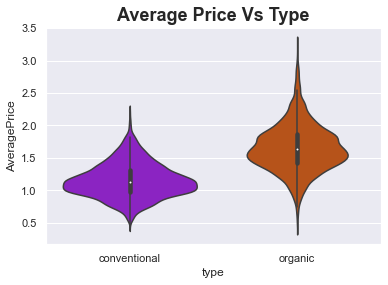

In [19]:
sns.violinplot(x="type",y="AveragePrice",palette="gnuplot", data=df)
plt.title("Average Price Vs Type", fontsize=18, fontweight="bold")

- Average Price of Organic Avocado's is higher than Conventional Avocado.

<a id=section50206></a>
### Plotting TotalVolume Vs Region

<Figure size 1152x504 with 0 Axes>

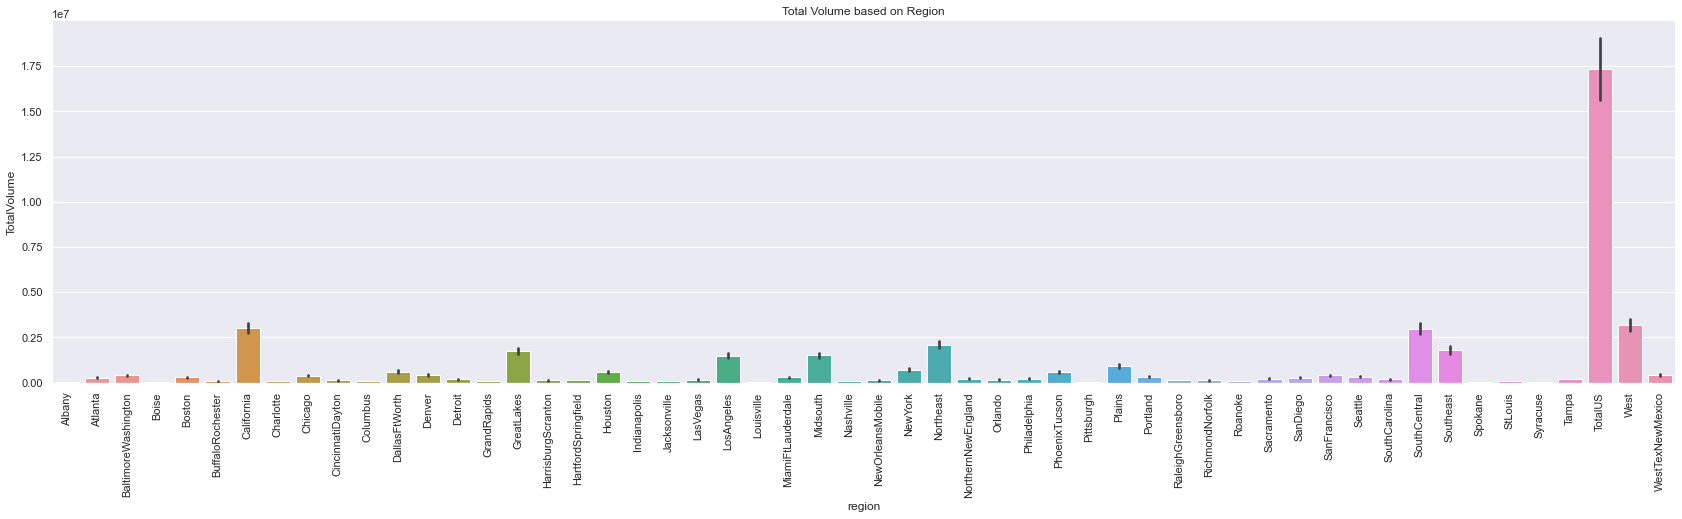

In [20]:
plt.figure(figsize=(16, 7))
sns.catplot(x="region", y="TotalVolume", data=df,kind='bar',size=6,aspect=4)
plt.title("Total Volume based on Region")
plt.xticks(rotation=90)
plt.show()


- Total Volume i.e., Avocado's are highly consumed in TotalUS followed by West, California, SouthCentral & SouthEast.

<a id=section50207></a>
### Plotting Total Bags Vs Region

<Figure size 1152x504 with 0 Axes>

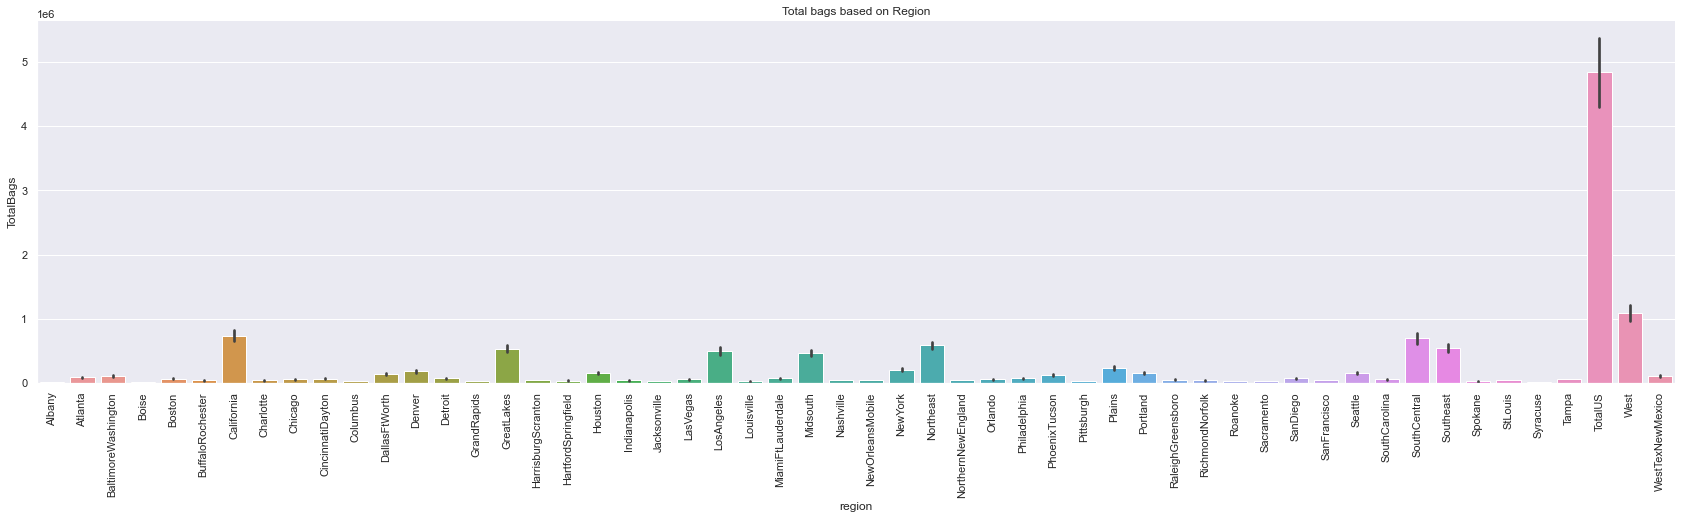

In [21]:
plt.figure(figsize=(16, 7))
sns.catplot(x="region", y="TotalBags", data=df,kind='bar',size=6,aspect=4)
plt.title("Total bags based on Region")
plt.xticks(rotation=90)
plt.show()


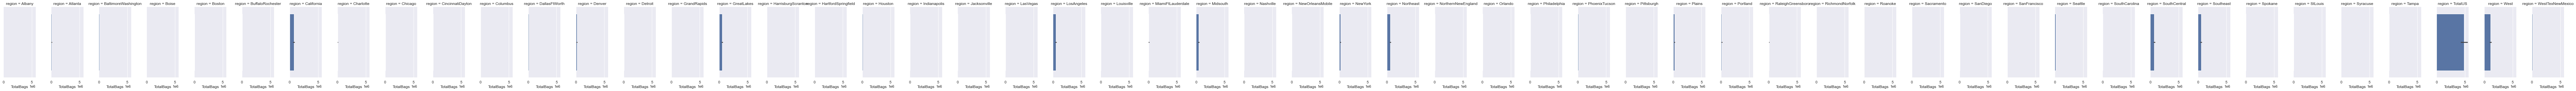

In [22]:

#sns.factorplot(x ='region', y ='TotalBags',  hue =['SmallBags','LargeBags','XLargeBags'], kind='bar',data = df,size=4,aspect=2, ci=None) 
g = sns.FacetGrid(df, col="region", height=4, aspect=.5)
g.map(sns.barplot, "TotalBags", order=["SmallBags", "LargeBags","XLargeBags" ])

- Total Bags of Avocados consumed is highest in TotalUS.

<a id=section503></a>
## *MultiVariate Analysis*

<a id=section50301></a>
### Analysis of Total Volume against Year

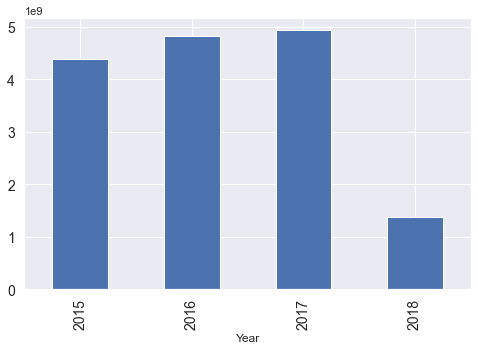

In [23]:

Year = df['TotalVolume' ].groupby(df.Year).sum()
Year.plot(kind='bar', fontsize = 14,figsize=(8,5))
plt.show()

- Consumption volume increased from 2015 to 2017 first half and then declined sharply in 2018.

<a id=section50302></a>
### Analysis of Types of Bags, Total Bags, Total Volume & Year

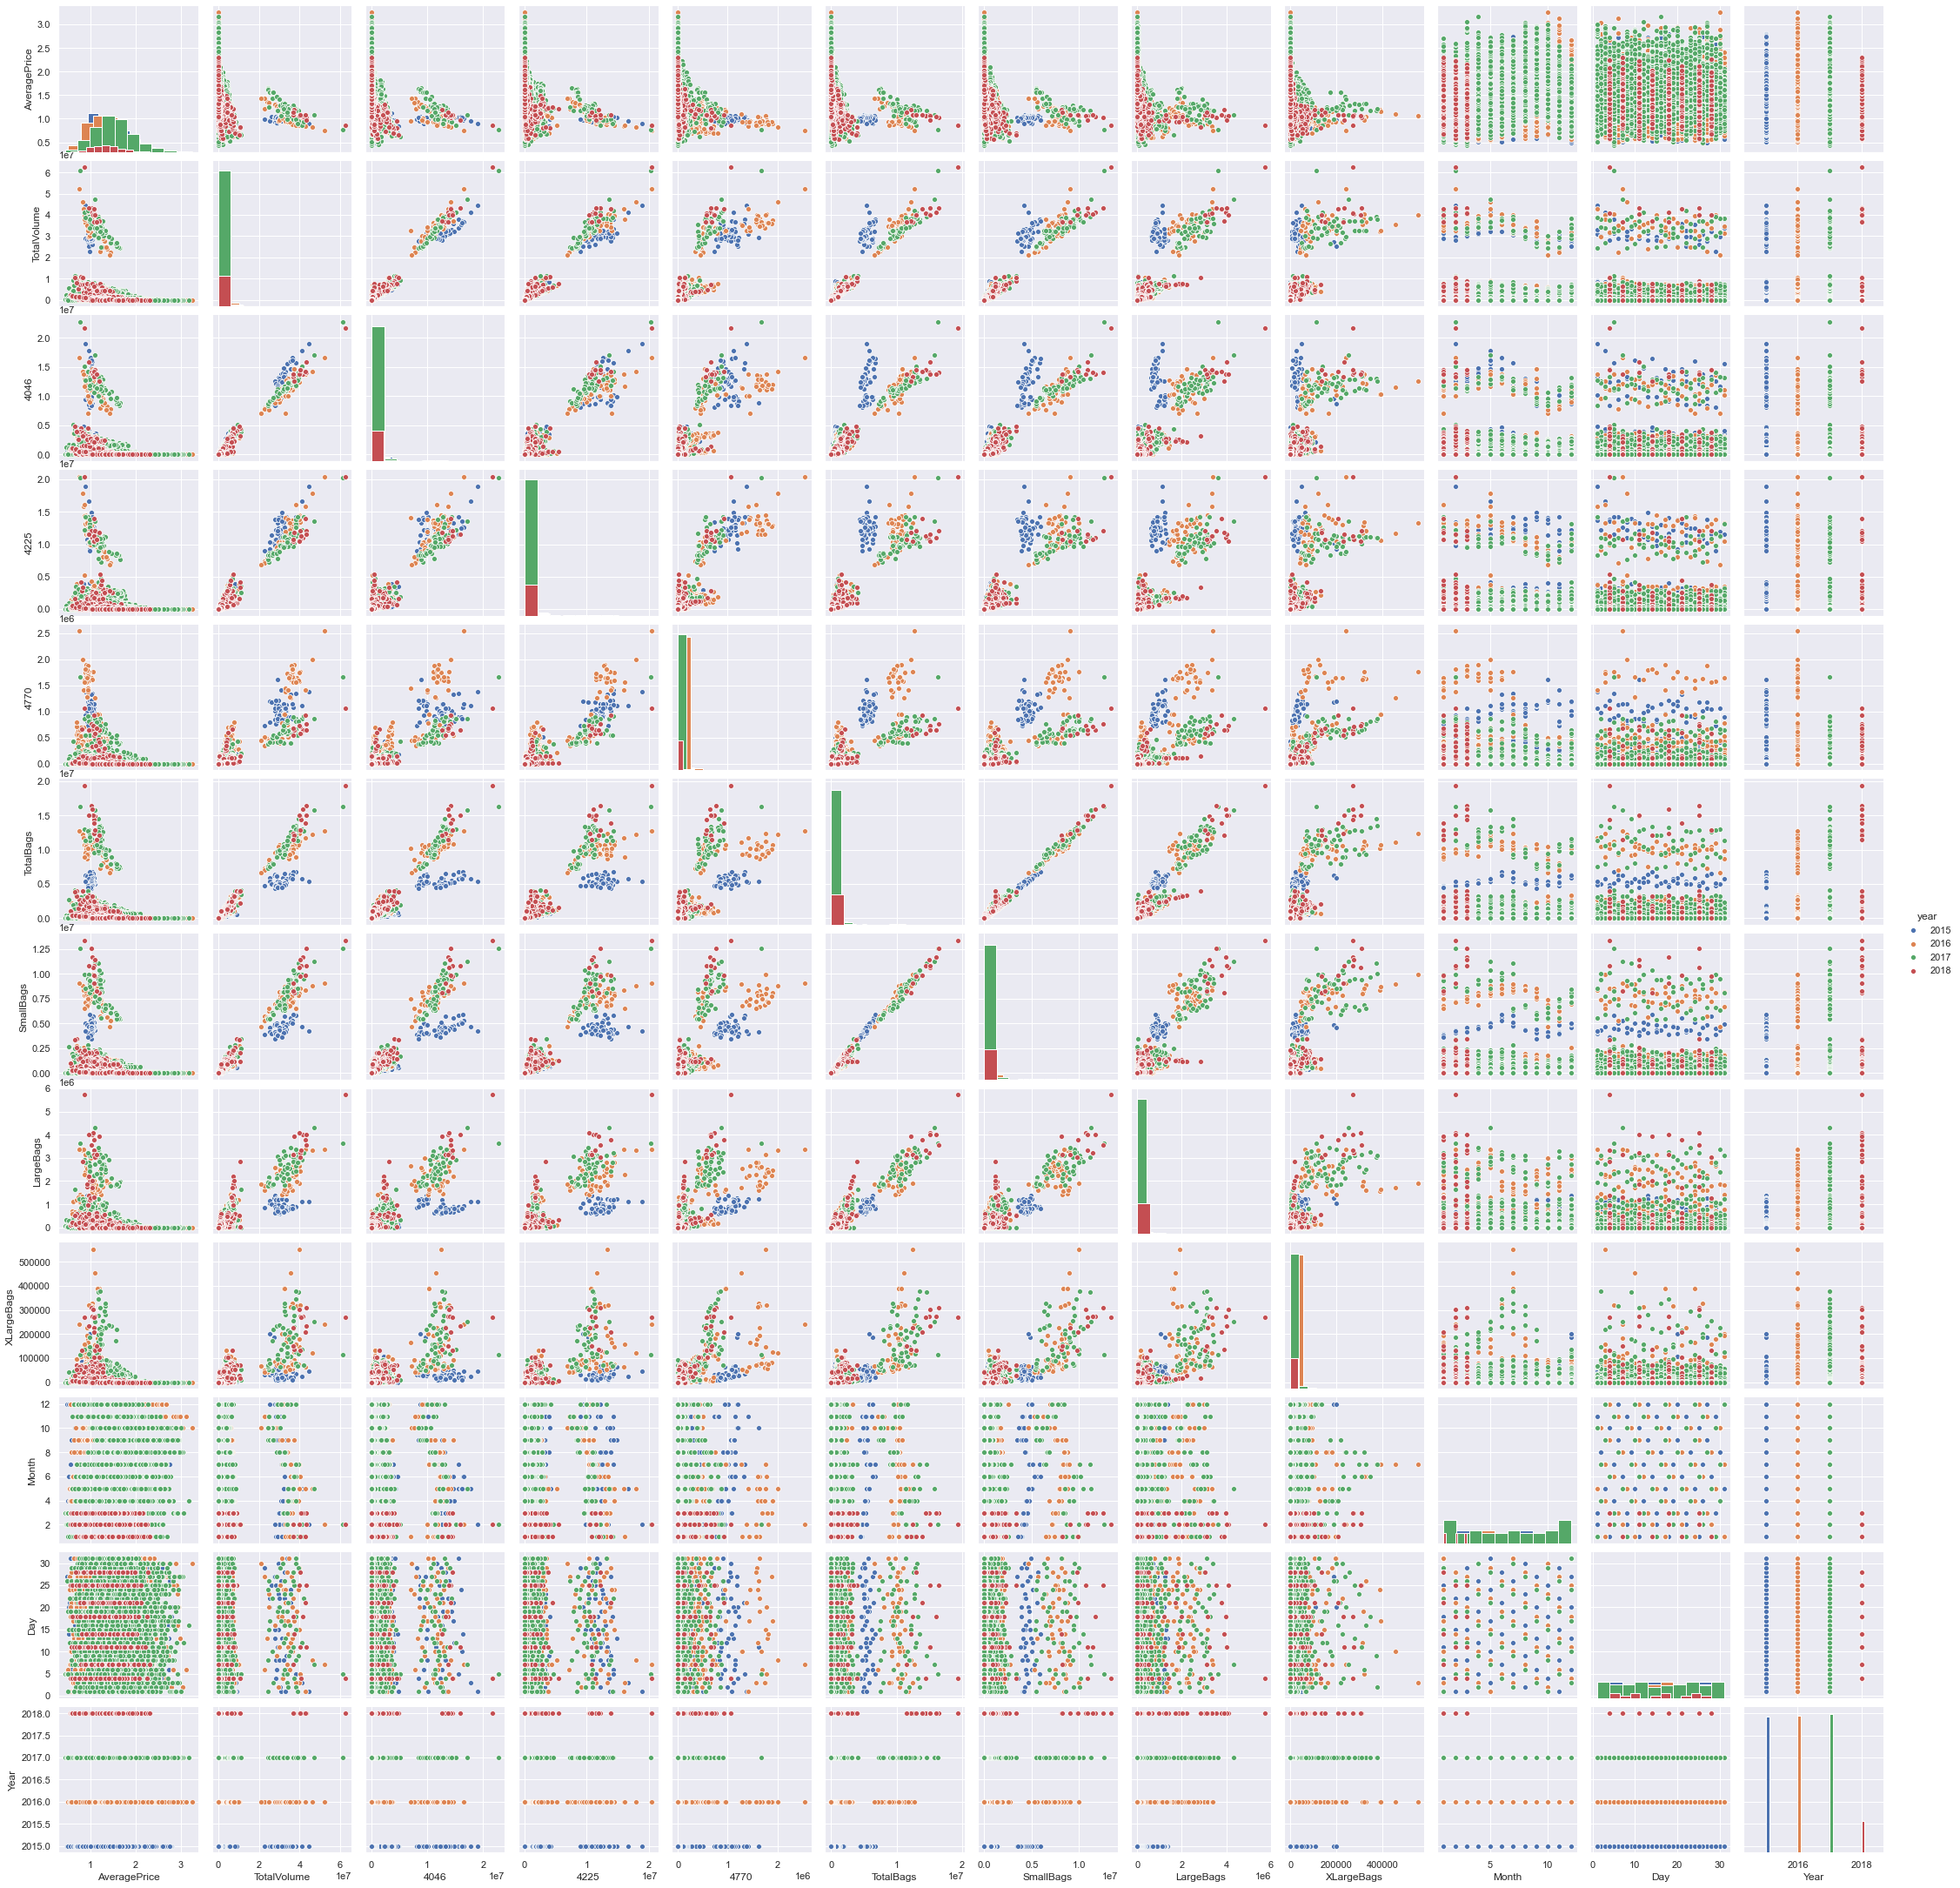

In [24]:
sns.pairplot(df,hue="year",diag_kind="hist")

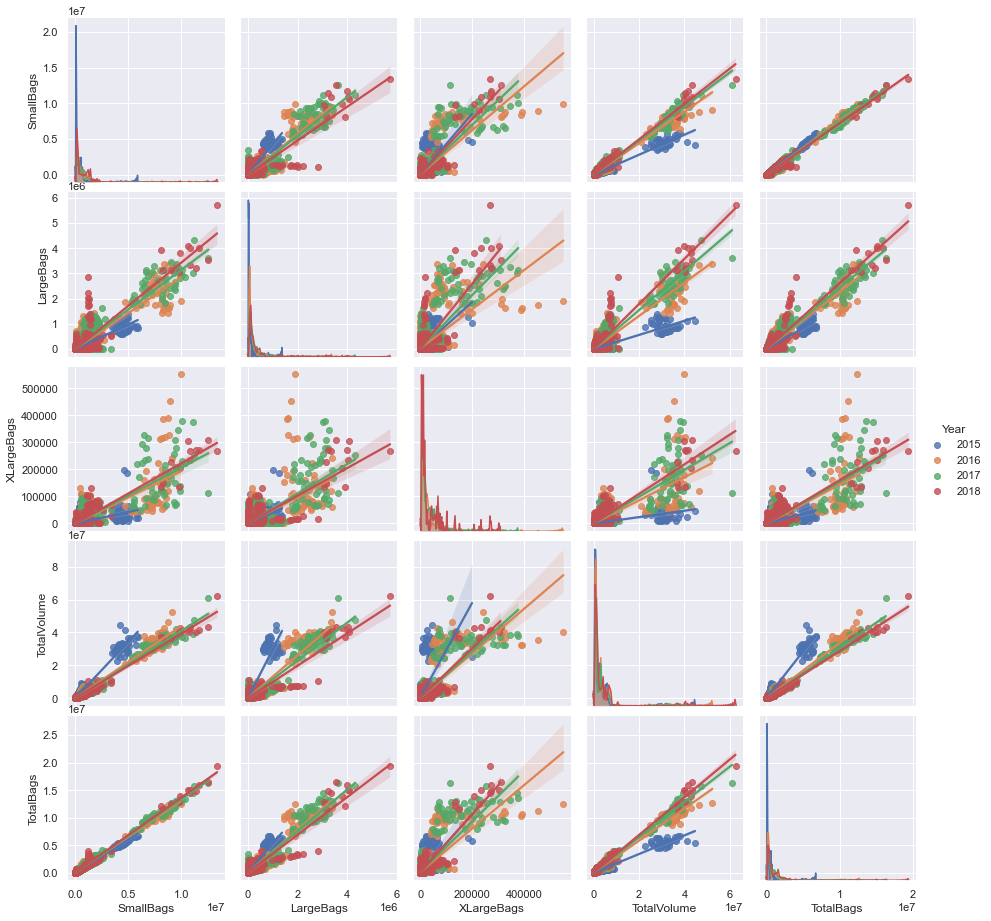

In [25]:
consumption = df[['SmallBags','LargeBags','XLargeBags','TotalVolume','TotalBags','Year']]
sns.pairplot(consumption, hue="Year",kind="reg")
plt.show()

- Among all bag varities ratio of Small Bags is highest in 2018 followed by 2015.

- Total Bags used is highest in 2015 and least in 2018.

<a id=section50303></a>
### Analysis of Avocado Varieties against Months

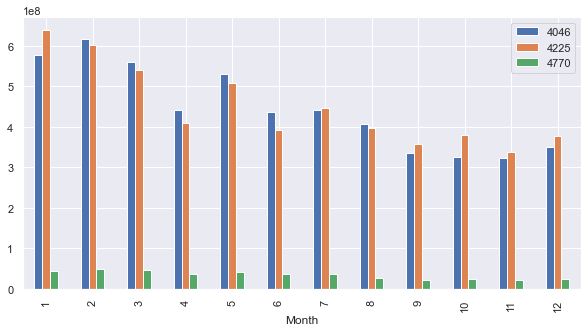

In [26]:
variant = df[['4046', '4225', '4770']].groupby(df.Month).sum()
variant.plot(kind='bar',figsize=(10,5))

- Avocados with PLU Code 4225 are more consumed in January and least in November. 

- Avocados with PLU Code 4046 are more consumed in February and least consumed in October & November.

- Avocaods consumption is slightly declined towards the end of the year.

- Avocados with PLU Code 4770 are least consumed throughout the year whereas 4225 & 4046 are almost equally consumed.

- Avocados with PLU Code 4770 consumption is almost constant till July and then declined constantly towards end of the Year.

<a id=section50304></a>
### Analysis of Avocado Varieties against Region

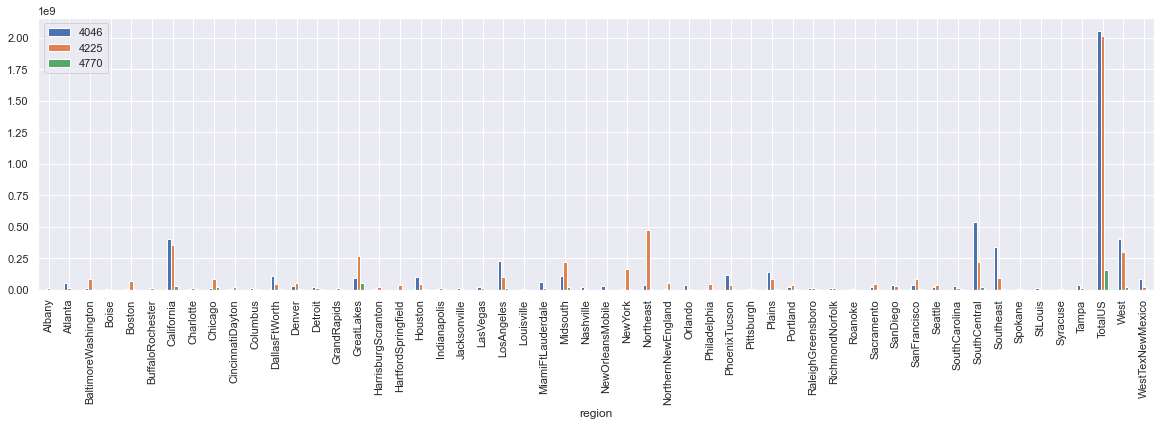

In [27]:
variant = df[['4046', '4225', '4770']].groupby(df.region).sum()
variant.plot(kind='bar')
fig=plt.gcf()
fig.set_size_inches(20,5)
plt.show()

- Avocados with PLU Code 4046 are the highest consumed across regions.
- TotalUS has highest consumption of Avocados.
- Avocados of all PLU Codes consumption is highest in TotalUS followed by SouthCentral, California & West.

<a id=section50305></a>
### Analysis of Avocado Varieties against AveragePrice

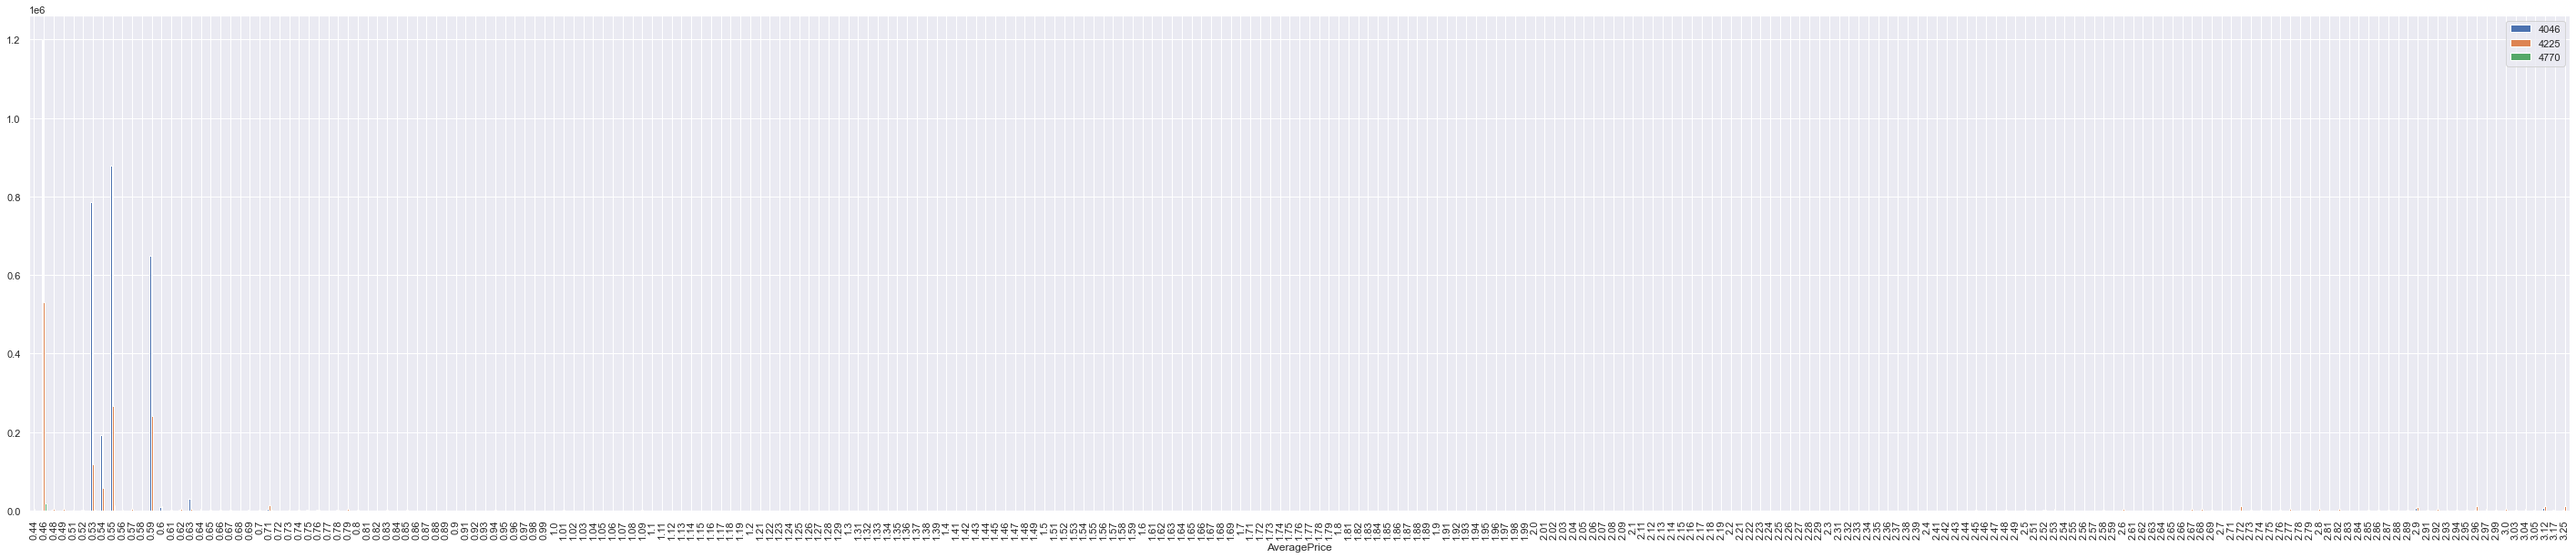

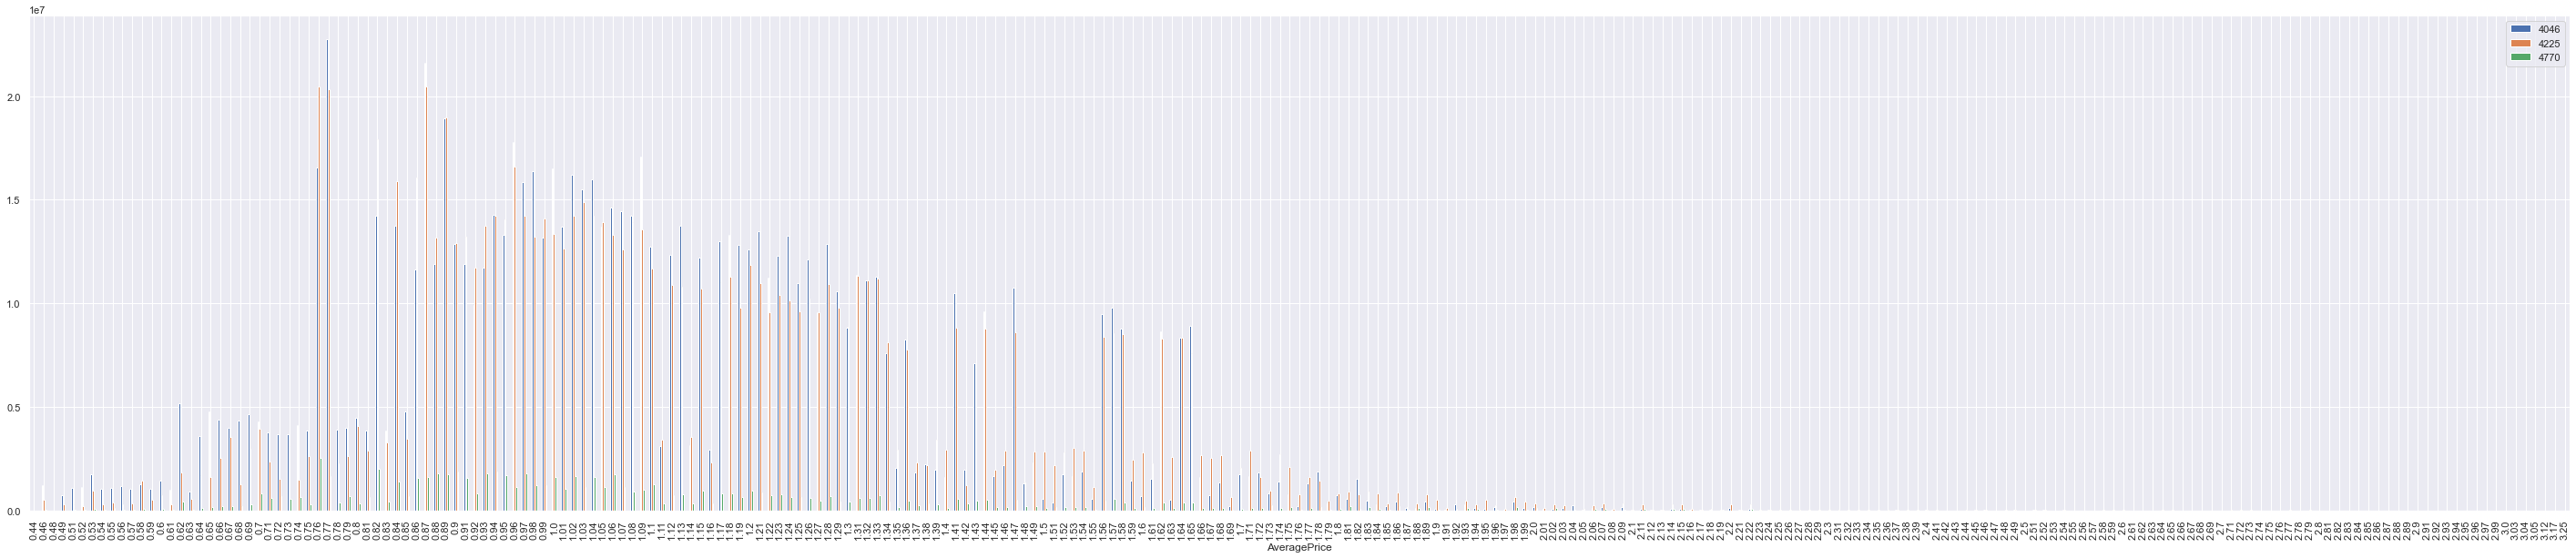

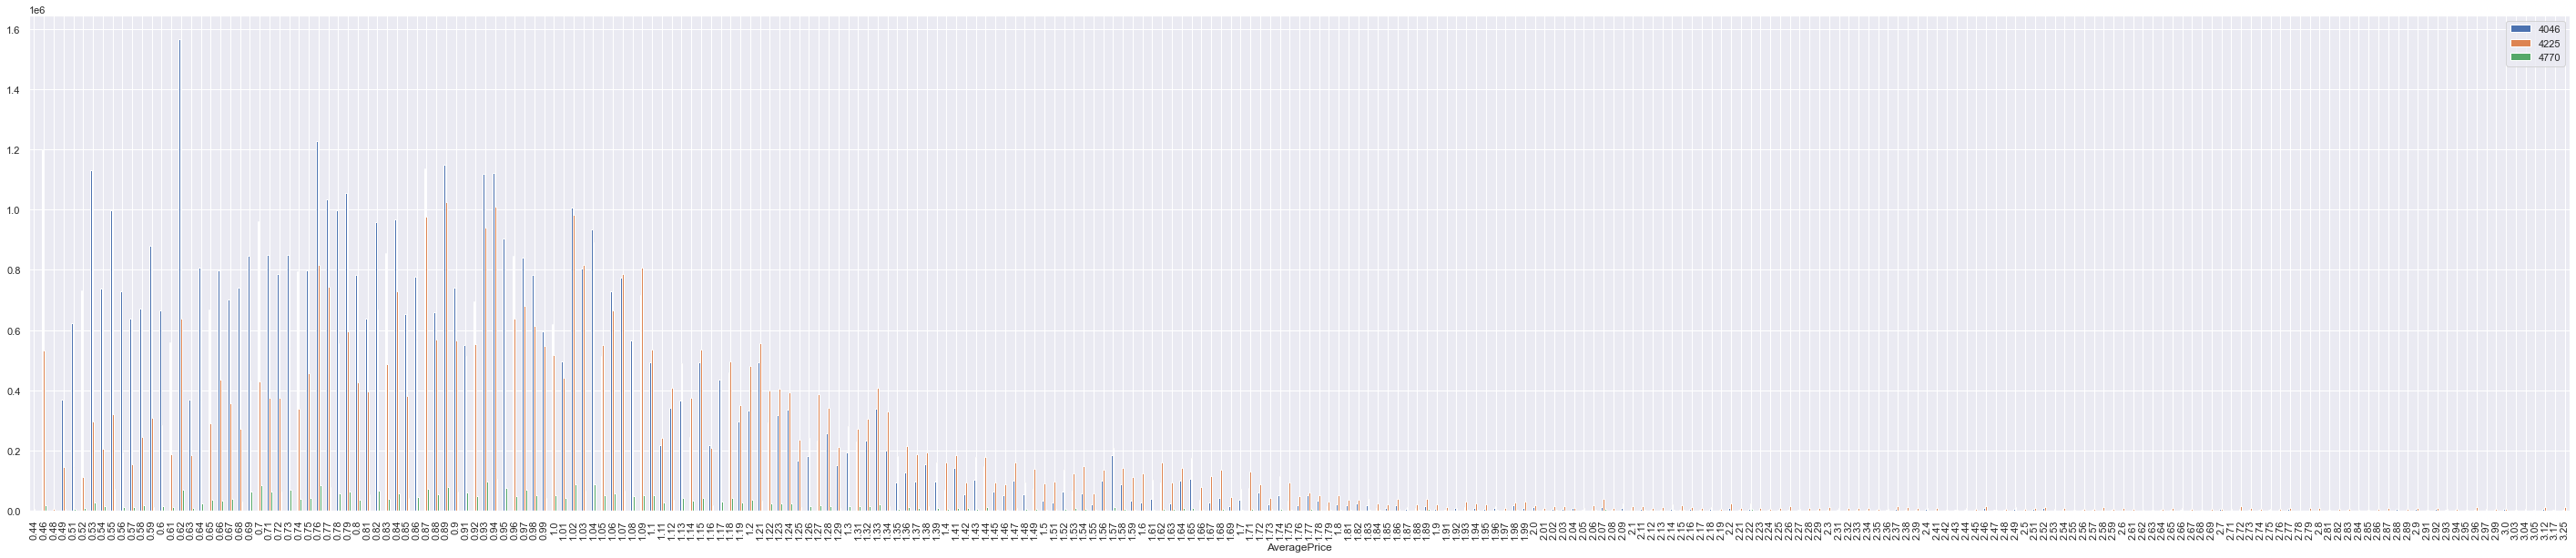

In [28]:
avgprice_min = df[['4046', '4225', '4770']].groupby(df.AveragePrice).min()
avgprice_min.plot(kind='bar')
fig=plt.gcf()
fig.set_size_inches(50,10)

avgprice_max = df[['4046', '4225', '4770']].groupby(df.AveragePrice).max()
avgprice_max.plot(kind='bar')
fig=plt.gcf()
fig.set_size_inches(50,10)

avgprice_mean = df[['4046', '4225', '4770']].groupby(df.AveragePrice).mean()
avgprice_mean.plot(kind='bar')
fig=plt.gcf()
fig.set_size_inches(50,10)

#fig = plt.figure(figsize =(10, 7)) 


plt.show()


- Avocados with PLU Code 4046 are highly sold when the Minimum AveragePrice is 0.46.
- Avocados with PLU Code 4046 are highly sold when the Maximum AveragePrice is 0.77.
- Avocados with PLU Code 4046 are highly sold when the Mean AveragePrice is 0.62.
- Avocados with PLU Code 4225 are highly sold when the AveragePrice is 0.87 & 0.89.
- Avocados sales decrease when the AveragePrice crossed 2.

<a id=section50306></a>
### Analysis of Avocado Varieties against Type

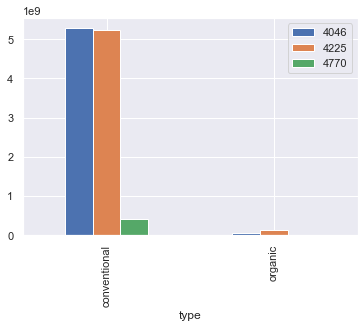

In [29]:
variant = df[['4046', '4225', '4770']].groupby(df.type).sum()
variant.plot(kind='bar')
#fig=plt.gcf()
fig.set_size_inches(15,5)
plt.show()

- Conventional Avocados are highly sold of which 4046 are highly sold followed by 4225.
- Organic Avocados with PLU Code 4770 are not sold at all.

<a id=section50307></a>
### Analysis of Total Volume Vs AveragePrice based on Year

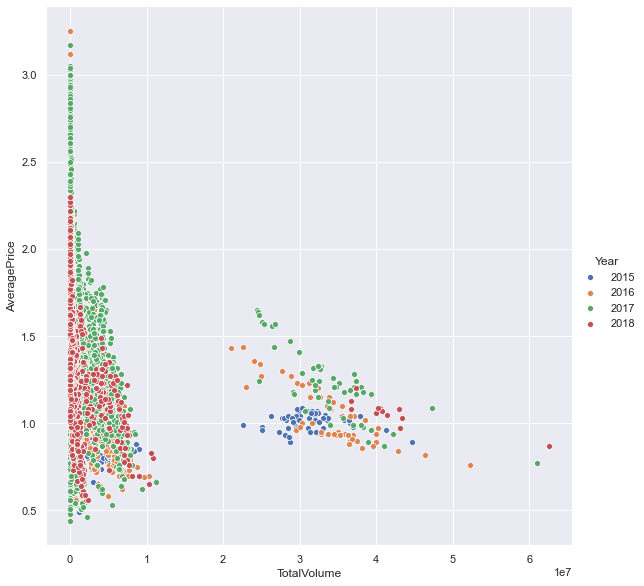

In [30]:
sns.pairplot(x_vars=['TotalVolume'], y_vars=['AveragePrice'], data=df, hue="Year", height=8)
plt.show()

- Average Price is highest in 2016 followed by 2017.
- Total Volume is highest in 2018 followed by 2017.

<a id=section50308></a>
### Analysis of AveragePrice, Month & Year

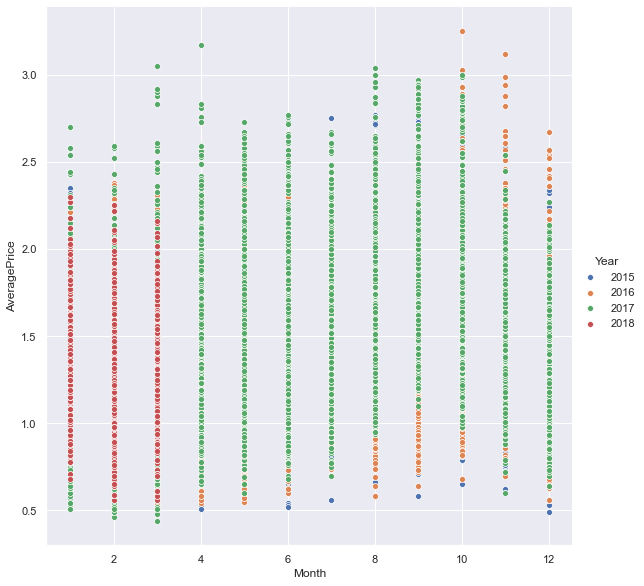

In [31]:
sns.pairplot(x_vars=['Month'], y_vars=['AveragePrice'], data=df, hue="Year", height=8)
plt.show()

- Average Price is highest in the Month of October 2016 and is least in March 2017.

<a id=section50309></a>
### Analysis of AveragePrice, Month & Type

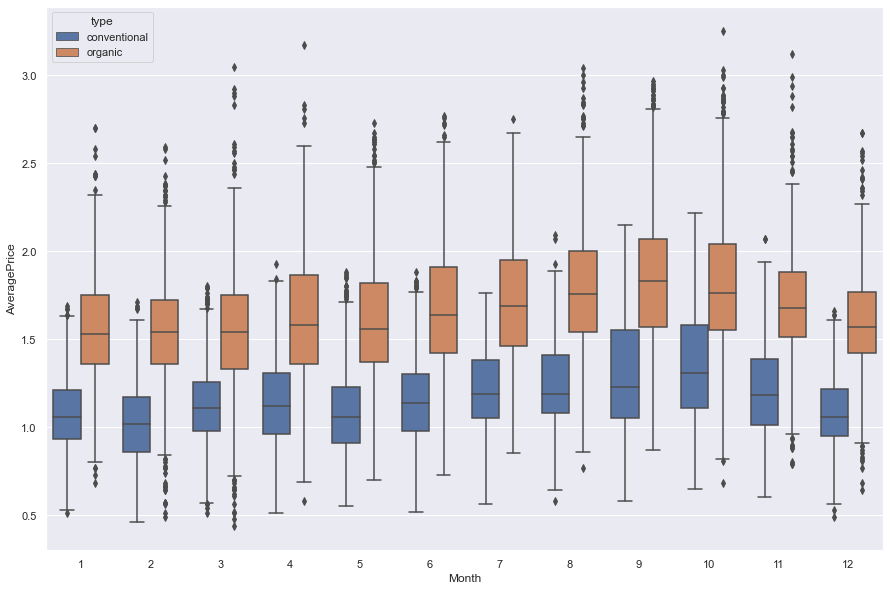

In [32]:
sns.boxplot(y="AveragePrice",x="Month",hue='type',data=df)
fig=plt.gcf()
fig.set_size_inches(15,10)

- Organic Avocados AveragePrice is high when compared to Conventional.
- Organic Avocados AveragePrice is highest in October and Least in March.
- Conventional Avocados AveragePrice is highest in August and Least in December.
- Conventional Avocados AveragePrice range is highest in September.

- Dropping Region field as we don't need that for Linear Regression

- Dropping Date field as we've already created fields for Year, Day & Month

- Performing One-Hot Encoding to convert Type to numerical variable from Categorical so that it can participate in Linear Regression.

<a id=section504></a>
## *Preprocessing for ML modelling*

<a id=section50401></a>
### Dropping Region & Date columns from Dataframe which aren't relevant for our Model Analysis

In [33]:
df.drop(['region','Date'],axis=1,inplace=True)

<a id=section50402></a>
### Categorical Encoding based on Avocado Type 

In [34]:
df_final=pd.get_dummies(df)

<a id=section505></a>
## *Correlation between numerical variables*

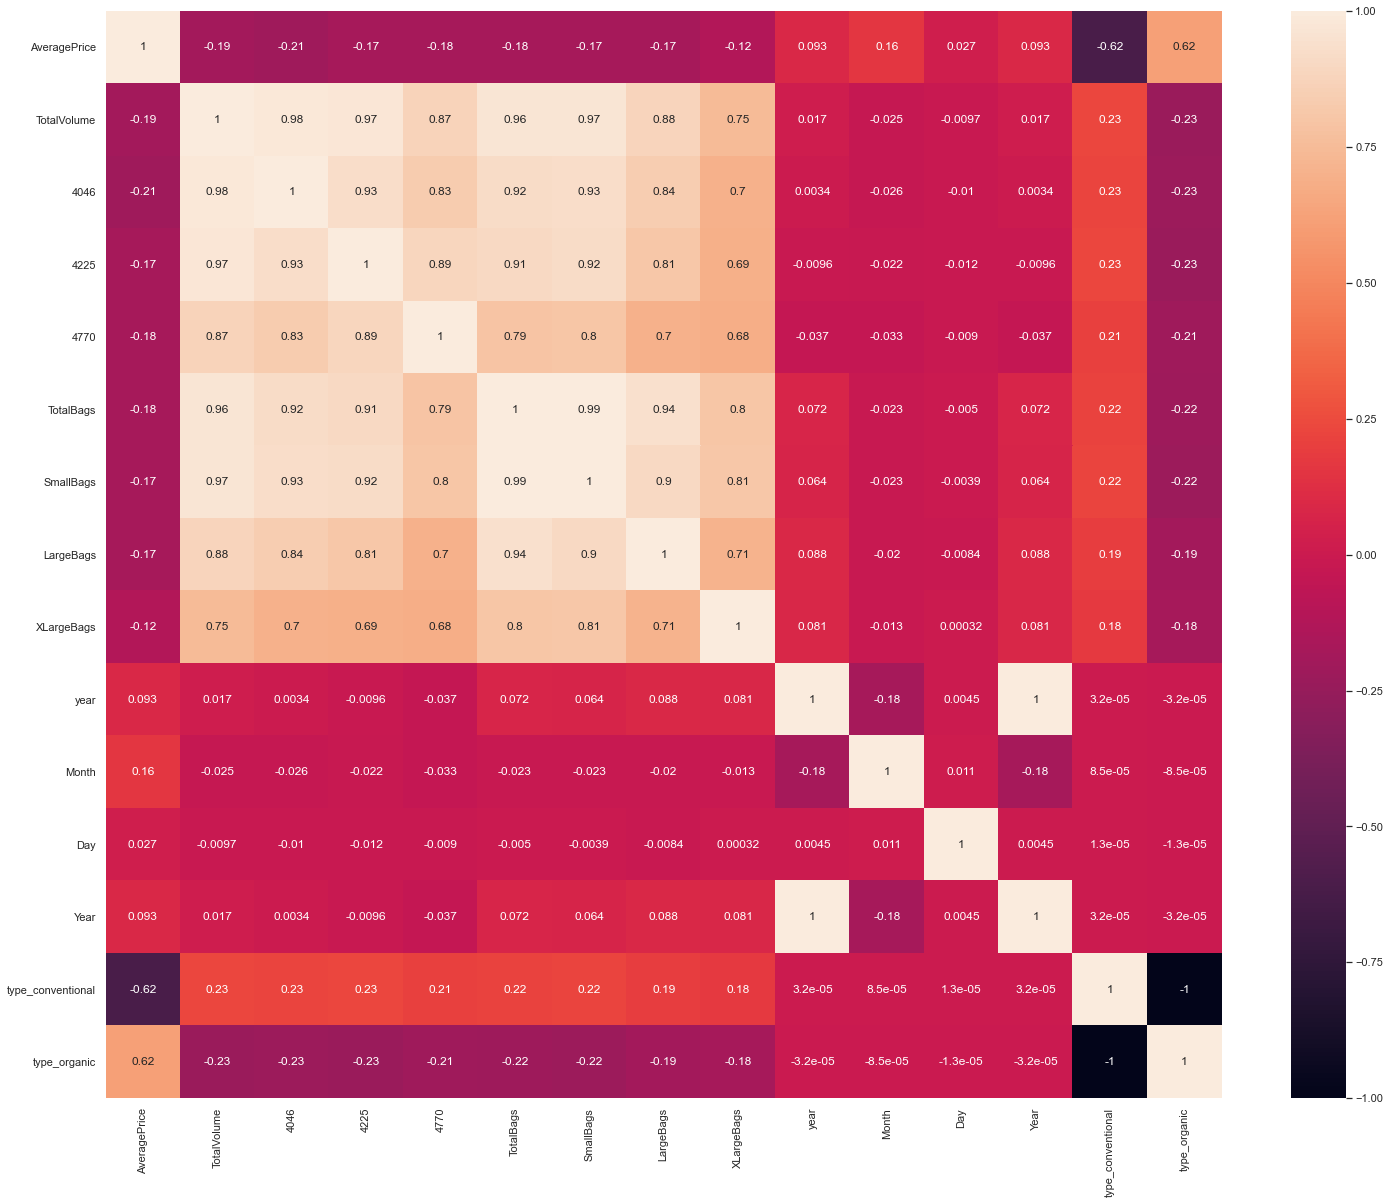

In [35]:
sns.heatmap(df_final.corr(),annot=True)
fig=plt.gcf()
fig.set_size_inches(25,20)

- Total Bags sold is highly correlated with SmallBags sold.
- Avocados 4046 are highly correlated with Total Volume.
- Avocados 4225 are highly correlated with Total Volume.
- Conventional Avocados are least correlated with AveragePrice.

<a id=section6></a>
## Machine Learning Modelling

* Prepare Source & Target Features
* Import Train & Test split package from sklearn.model_selection library
* Split dataset for Train & Test, Test size would be 20% 

In [36]:
X=df_final.iloc[:,df_final.columns!='AveragePrice']
y=df_final['AveragePrice']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [37]:
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (14599, 14)
y_train shape:  (14599,)

Test cases as below
X_test shape:  (3650, 14)
y_test shape:  (3650,)


<a id=section601></a>
### Regression Machine Learning Models

<a id=section60101></a>
#### Linear Regression Model

* Import Linear Regression package from sklearn.linear_model library
* Instantiate Linear Regression package
* Fit the train dataset
* Predict Linear Regression model output

In [38]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)


LinearRegression()

In [39]:
y_pred_train_lr = lr.predict(X_train) 

In [40]:
y_pred_test_lr = lr.predict(X_test)                 # make predictions on the testing set

<a id=section6010101></a>
##### Plot between Test data & Predicted Data for Linear Regression model

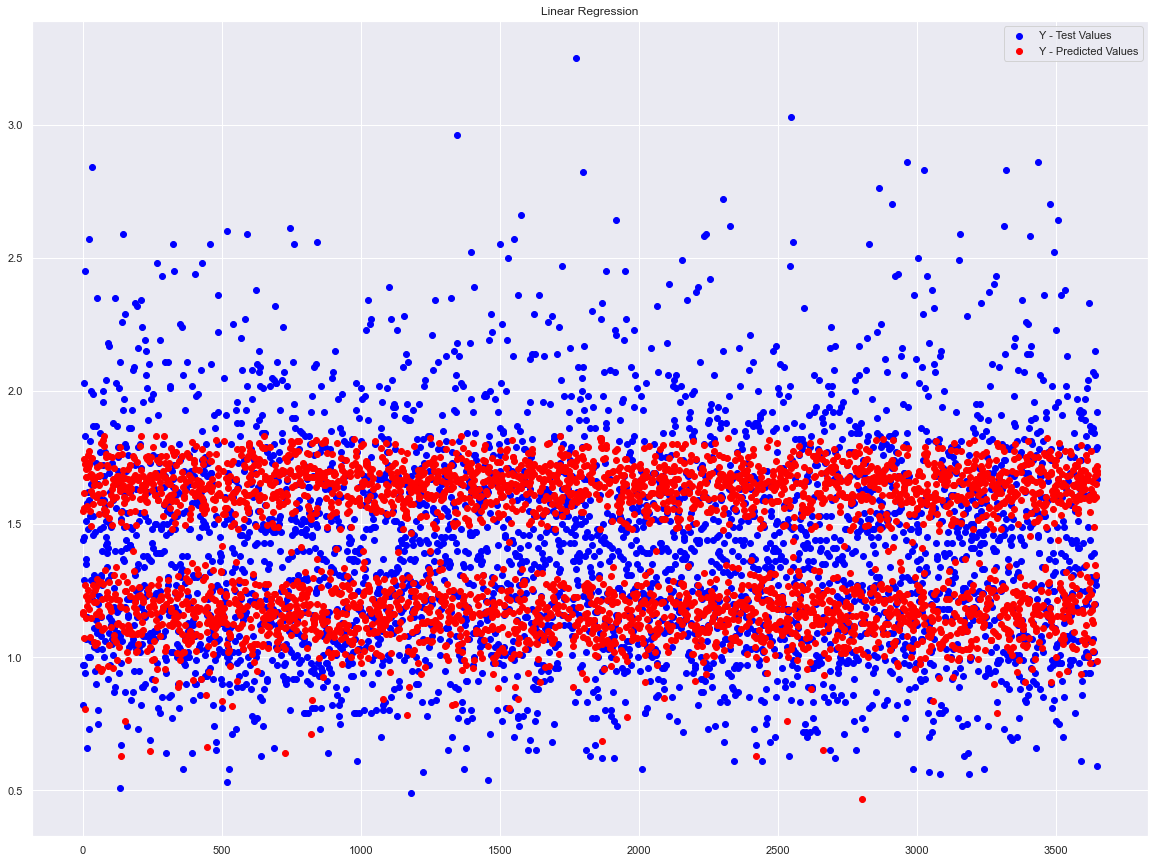

In [41]:
plt.scatter(y=y_test,x=np.arange(0,3650),color='blue',label='Y - Test Values')
plt.scatter(y=y_pred_test_lr,x=np.arange(0,3650),color='red',label='Y - Predicted Values')
plt.title('Linear Regression')
plt.legend(loc='upper right')
fig=plt.gcf()
fig.set_size_inches(20,15)

<a id=section60102></a>
#### Decision Tree Regression Model

* Import DecisionTreeRegressor package from sklearn.tree library
* Instantiate DecisionTreeRegressor package
* Fit the train dataset
* Predict DecisionTreeRegressor model output

In [42]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)


DecisionTreeRegressor()

In [43]:
y_pred_train_dtr = dtr.predict(X_train) 

In [44]:
y_pred_test_dtr = dtr.predict(X_test)   

<a id=section6010201></a>
##### Plot between Test data & Predicted Data for Decision Tree Regression model

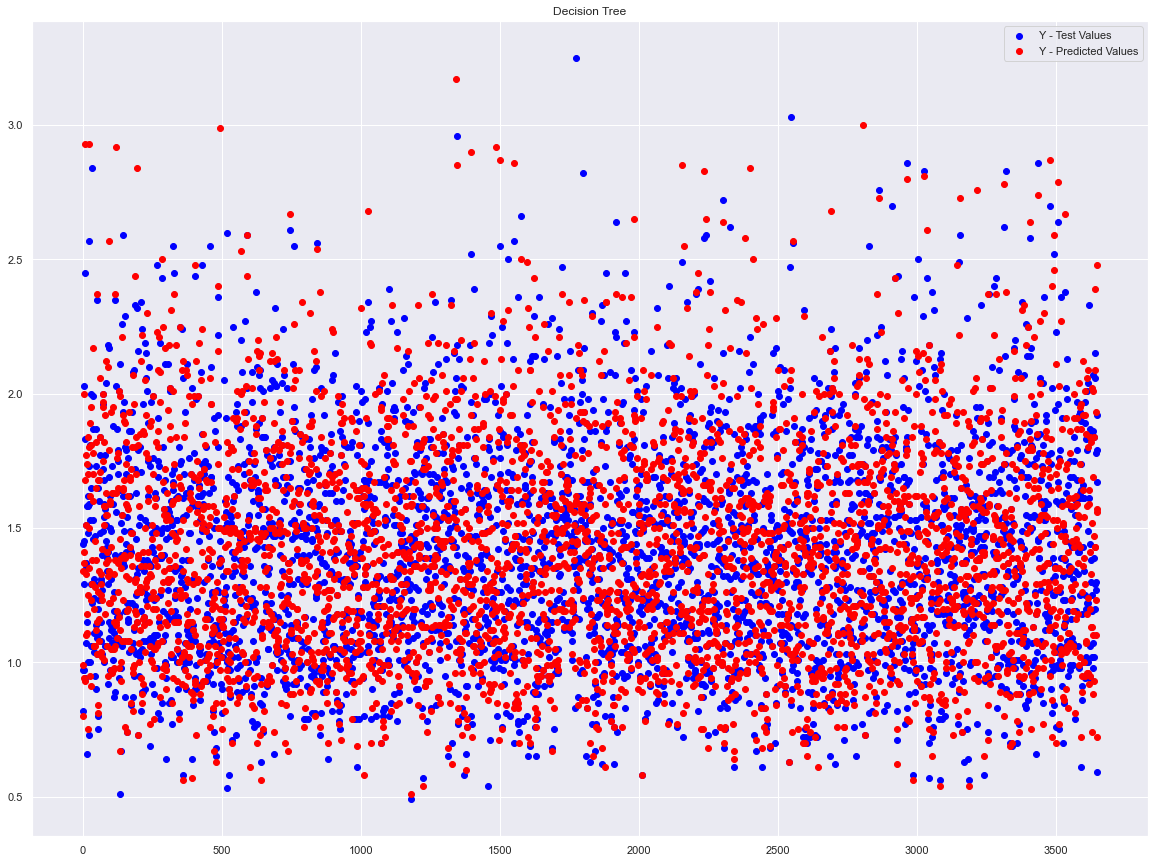

In [45]:
plt.scatter(y=y_test,x=np.arange(0,3650),color='blue',label='Y - Test Values')
plt.scatter(y=y_pred_test_dtr,x=np.arange(0,3650),color='red',label='Y - Predicted Values')
plt.title('Decision Tree')
plt.legend(loc='upper right')
fig=plt.gcf()
fig.set_size_inches(20,15)

<a id=section60103></a>
#### Random Forest Regression Model

* Import RandomForestRegressor package from sklearn.ensemble library
* Instantiate RandomForestRegressor package
* Fit the train dataset
* Predict RandomForestRegressor model output

In [46]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)


RandomForestRegressor()

In [47]:
y_pred_train_rfr = rfr.predict(X_train) 

In [48]:
y_pred_test_rfr = rfr.predict(X_test) 

<a id=section6010301></a>
##### Plot between Test data & Predicted Data for Random Forest Regression model

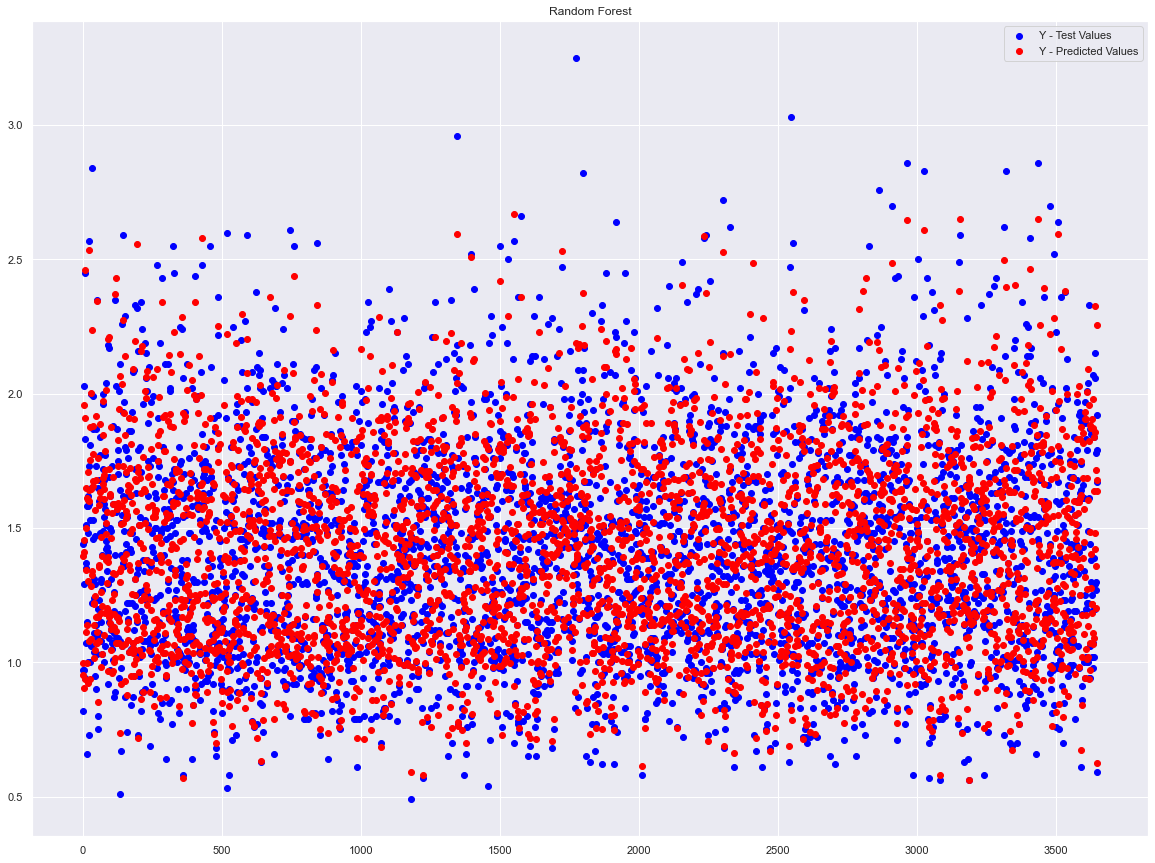

In [49]:
plt.scatter(y=y_test,x=np.arange(0,3650),color='blue',label='Y - Test Values')
plt.scatter(y=y_pred_test_rfr,x=np.arange(0,3650),color='red',label='Y - Predicted Values')
plt.title('Random Forest')
plt.legend(loc='upper right')
fig=plt.gcf()
fig.set_size_inches(20,15)

## Prediction between test and all model test

In [50]:
pd.DataFrame({'Y Test':y_test , 'LR Pred':y_pred_test_lr,'DTR Pred':y_pred_test_dtr,'RF Pred':y_pred_test_rfr},columns=['Y Test','LR Pred','DTR Pred','RF Pred'])

Y Test   LR Pred  DTR Pred  RF Pred
8604     0.82  1.163895      0.80   0.9538
2608     0.97  1.168086      0.99   0.9969
14581    1.44  1.550844      1.34   1.3944
4254     0.97  1.070764      0.94   0.9031
16588    1.45  1.618120      1.41   1.4535
...       ...       ...       ...      ...
15956    1.27  1.602374      1.10   1.3568
12471    1.67  1.688836      1.56   1.6384
4574     0.59  0.986929      0.72   0.6265
16359    1.92  1.697867      1.57   1.6795
16249    1.79  1.717019      2.48   2.2551

[3650 rows x 4 columns]

<a id=section602></a>
### Plot Comparing Test & ML Models Predicted values

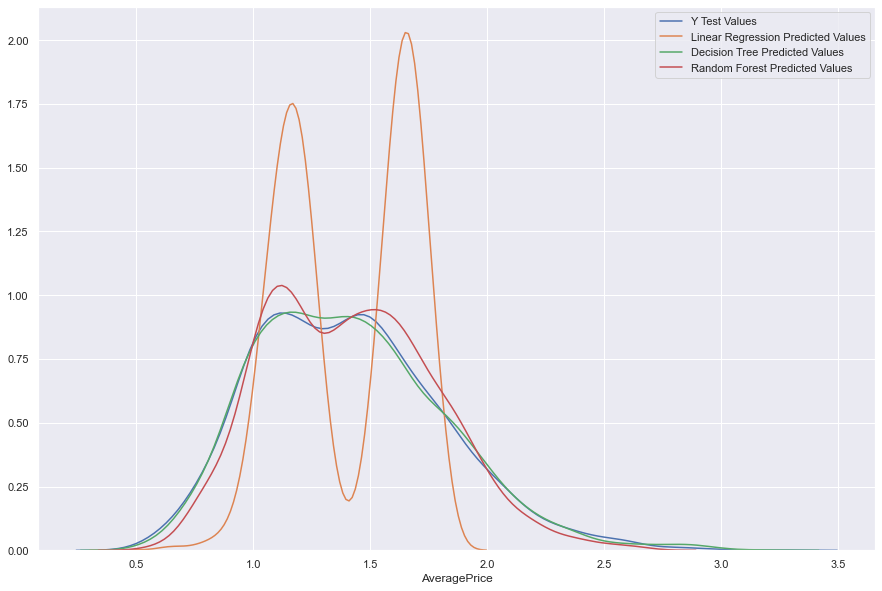

In [51]:
sns.distplot((y_test),bins=50,label='Y Test Values',hist=False)
sns.distplot((y_pred_test_lr),bins=50,label='Linear Regression Predicted Values',hist=False)
sns.distplot((y_pred_test_dtr),bins=50,label='Decision Tree Predicted Values',hist=False)
sns.distplot((y_pred_test_rfr),bins=50,label='Random Forest Predicted Values',hist=False)
plt.legend(loc='upper right')
fig=plt.gcf()
fig.set_size_inches(15,10)

- From the above plot we can say that Decision Tree is quiet close to Test Values, followed by Random Forest

<a id=section603></a>
### Plot Comparing ML Model Residuals

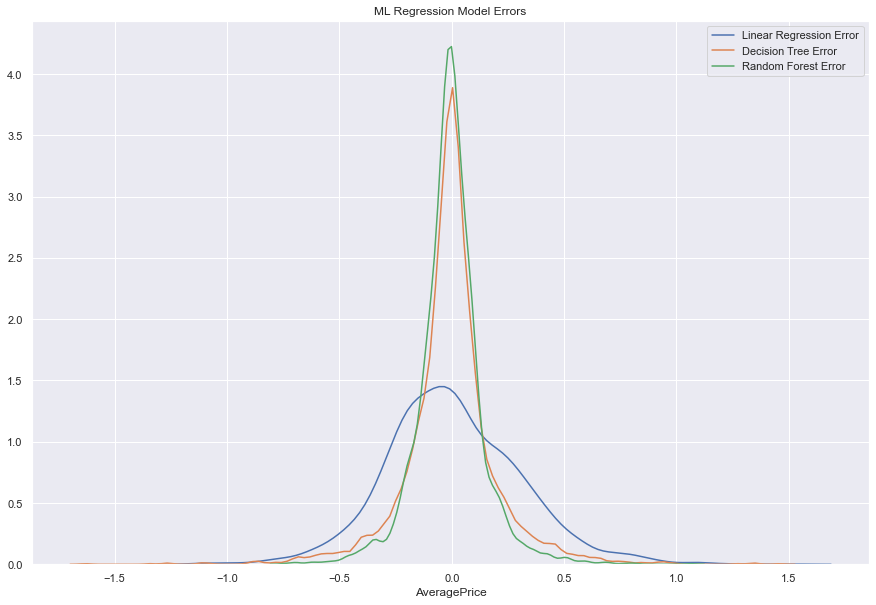

In [52]:
sns.distplot((y_test-y_pred_test_lr),bins=50,label='Linear Regression Error',hist=False)
sns.distplot((y_test-y_pred_test_dtr),bins=50,label='Decision Tree Error',hist=False)
sns.distplot((y_test-y_pred_test_rfr),bins=50,label='Random Forest Error',hist=False)
plt.legend(loc='upper right')
plt.title("ML Regression Model Errors")
fig=plt.gcf()
fig.set_size_inches(15,10)

-  From the above we can say that Random Forest has the highest variance with Test Value at the center i.e., it is distant from the Predicted value.

In [53]:
print("Linear Regression Error \n",(y_test-y_pred_test_lr))
print("Decision Tree Error \n",(y_test-y_pred_test_dtr))
print("Random Forest Error \n",(y_test-y_pred_test_rfr))



Linear Regression Error 
 8604    -0.343895
2608    -0.198086
14581   -0.110844
4254    -0.100764
16588   -0.168120
           ...   
15956   -0.332374
12471   -0.018836
4574    -0.396929
16359    0.222133
16249    0.072981
Name: AveragePrice, Length: 3650, dtype: float64
Decision Tree Error 
 8604     0.02
2608    -0.02
14581    0.10
4254     0.03
16588    0.04
         ... 
15956    0.17
12471    0.11
4574    -0.13
16359    0.35
16249   -0.69
Name: AveragePrice, Length: 3650, dtype: float64
Random Forest Error 
 8604    -0.1338
2608    -0.0269
14581    0.0456
4254     0.0669
16588   -0.0035
          ...  
15956   -0.0868
12471    0.0316
4574    -0.0365
16359    0.2405
16249   -0.4651
Name: AveragePrice, Length: 3650, dtype: float64


- Showing the Variance by means of numeric representation.

<a id=section604></a>
### Plot Comparing Test Values with ML Model Predictions

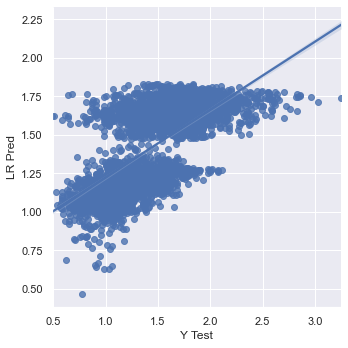

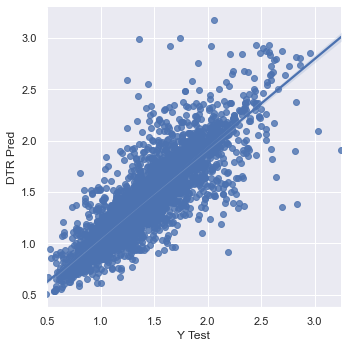

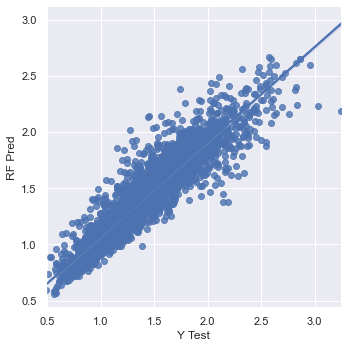

In [54]:
data = pd.DataFrame({'Y Test':y_test ,'LR Pred':y_pred_test_lr,'DTR Pred':y_pred_test_dtr,'RF Pred':y_pred_test_rfr},columns=['Y Test','LR Pred','DTR Pred','RF Pred'])
sns.lmplot(x='Y Test',y='LR Pred',data=data)
sns.lmplot(x='Y Test',y='DTR Pred',data=data)
sns.lmplot(x='Y Test',y='RF Pred',data=data)

- From the above plot we can say that Predicted Values for Random Forest are linearly aligned when compared to other Regression Models.

<a id=section605></a>
### Model Evaluation Metrics

In [55]:
import numpy as np
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

<a id=section60501></a>
##### Mean Absolute Error value across Algorithms

In [56]:
print('Linear Regression MAE:', metrics.mean_absolute_error(y_test, y_pred_test_lr))
print('Decision Tree MAE:', metrics.mean_absolute_error(y_test, y_pred_test_dtr))
print('Random Forest Regression MAE:', metrics.mean_absolute_error(y_test, y_pred_test_rfr))

Linear Regression MAE: 0.2329713329172356
Decision Tree MAE: 0.13511232876712329
Random Forest Regression MAE: 0.1005926301369863


#### Preparing a list of MAE values calculated for different ML Models

In [57]:
MAE=[]
MAE.append(metrics.mean_absolute_error(y_test, y_pred_test_lr))
MAE.append(metrics.mean_absolute_error(y_test, y_pred_test_dtr))
MAE.append(metrics.mean_absolute_error(y_test, y_pred_test_rfr))
print(MAE)

[0.2329713329172356, 0.13511232876712329, 0.1005926301369863]


<a id=section60502></a>
##### Mean Square Error value across Algorithms

In [60]:
print('Linear Regression MSE:', metrics.mean_squared_error(y_test, y_pred_test_lr))
print('Decision Tree MSE:', metrics.mean_squared_error(y_test, y_pred_test_dtr))
print('Random Forest MSE:', metrics.mean_squared_error(y_test, y_pred_test_rfr))


Linear Regression MSE: 0.09108802805372637
Decision Tree MSE: 0.04457397260273972
Random Forest MSE: 0.021439935268493145


#### Preparing a list of MSE values calculated for different ML Models

In [61]:
MSE=[]
MSE.append(metrics.mean_squared_error(y_test, y_pred_test_lr))
MSE.append(metrics.mean_squared_error(y_test, y_pred_test_dtr))
MSE.append(metrics.mean_squared_error(y_test, y_pred_test_rfr))
print(MSE)

[0.09108802805372637, 0.04457397260273972, 0.021439935268493145]


<a id=section60503></a>
##### Root Mean Square Error value across Algorithms

In [62]:
print('Linear Regression RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_lr)))
print('Decision Tree RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_dtr)))
print('Random Forest RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_rfr)))


Linear Regression RMSE: 0.3018079323903306
Decision Tree RMSE: 0.21112549017761859
Random Forest RMSE: 0.14642382070036672


#### Preparing a list of RMSE values calculated for different ML Models

In [63]:
RMSE=[]
RMSE.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_lr)))
RMSE.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_dtr)))
RMSE.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_rfr)))
print(RMSE)

[0.3018079323903306, 0.21112549017761859, 0.14642382070036672]


<a id=section60504></a>
##### Mean Absolute Percentage Error value across Algorithms

<a id=section6050401></a>
###### Custom Function to Calculate Mean Absolute Percentage Error

In [64]:
print('Linear Regression MAPE:', mean_absolute_percentage_error(y_test, y_pred_test_lr))
print('Decision Tree MAPE:', mean_absolute_percentage_error(y_test, y_pred_test_dtr))
print('Random Forest MAPE:', mean_absolute_percentage_error(y_test, y_pred_test_rfr))

Linear Regression MAPE: 17.64294823531925
Decision Tree MAPE: 9.74298420584248
Random Forest MAPE: 7.348020282907656


#### Preparing a list of MAPE values calculated for different ML Models

In [65]:
MAPE=[]
MAPE.append(mean_absolute_percentage_error(y_test, y_pred_test_lr))
MAPE.append(mean_absolute_percentage_error(y_test, y_pred_test_dtr))
MAPE.append(mean_absolute_percentage_error(y_test, y_pred_test_rfr))
print(MAPE)

[17.64294823531925, 9.74298420584248, 7.348020282907656]


<a id=section60205></a>
##### R Square Error value across Algorithms

In [66]:
print('Linear Regression R2E:', metrics.r2_score(y_test, y_pred_test_lr))
print('Decision Tree R2E:', metrics.r2_score(y_test, y_pred_test_dtr))
print('Random Forest R2E:', metrics.r2_score(y_test, y_pred_test_rfr))

Linear Regression R2E: 0.4330705934656054
Decision Tree R2E: 0.7225728081450349
Random Forest R2E: 0.8665584266383138


#### . Preparing a list of R Square Error values calculated for different ML Models

In [67]:
R2E=[]
R2E.append(metrics.r2_score(y_test, y_pred_test_lr))
R2E.append(metrics.r2_score(y_test, y_pred_test_dtr))
R2E.append(metrics.r2_score(y_test, y_pred_test_rfr))
print(R2E)

[0.4330705934656054, 0.7225728081450349, 0.8665584266383138]


##### Converting the Error Lists into a DataFrame

In [68]:
error_df = pd.DataFrame(R2E, index =['Linear Regression', 'Decision Tree Regressor', 'Random Forest Regressor'], 
                                              columns =['R^2E'])
error_df.head()

R^2E
Linear Regression        0.433071
Decision Tree Regressor  0.722573
Random Forest Regressor  0.866558

In [69]:
error_df['MAE']=MAE
error_df['MSE']=MSE
error_df['RMSE']=RMSE
error_df['MAPE']=MAPE
error_df['MAPE']=MAPE

<a id=section60506></a>
##### Dataframe showing ML Models & Evaluation Metrics against those Models

##### Error Dataframe showing ErrorScores between Test & Predicted Values for different Regression Machine Learning Models

In [70]:
error_df

R^2E       MAE       MSE      RMSE       MAPE
Linear Regression        0.433071  0.232971  0.091088  0.301808  17.642948
Decision Tree Regressor  0.722573  0.135112  0.044574  0.211125   9.742984
Random Forest Regressor  0.866558  0.100593  0.021440  0.146424   7.348020

<a id=section7></a>
### Conclusion

* Average Price is normally distributed
* Small / medium sized avocados in small sized bags are preferred
* Small sized bags are more preferred
* Annual variation in price  peaking from Sept – Oct
* Conventionally farmed option preferred, probably because of the price and sales.
* For this Problem, we'll be considering RMSE as our Evaluation Metric and from which it is evident that Random Forest has least Error score. 
* Even in Mean Absolute Error and Mean Square Error Evaluation Metrics Random Forest has the least Error Score. 
* Hence, we'll be considering Random Forest as our Model for predicting price in Avocado.